### Chapter 15. 실전 데이터 분석

### 음악 순위

#### [참고] selenium 설치

In [12]:
!pip install selenium==4.0.0a6

#### 코드 15.1

In [13]:
# 웹 사이트 접속을 위한 모듈
from selenium import webdriver
from bs4 import BeautifulSoup

# https://chromedriver.chromium.org/downloads 에서 
# ChromeDriver 97.0.4692.71을 다운로드
# 활용 예제 파일 위치에 저장
driver = webdriver.Chrome('chromedriver.exe')    
url  = 'https://music.bugs.co.kr/chart'
driver.get(url)     

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


#### [참고]

In [14]:
# tr 태그로 곡 정보 찾기 (1)
songs = soup.select('tr')
print(len(songs))

104


In [15]:
# tr 태그로 곡 정보 찾기 (2)
songs = soup.select('tbody > tr')
print(len(songs))

103


In [16]:
# tr 태그로 곡 정보 찾기 (3)
songs = soup.select('table > tbody > tr')
print(len(songs))

103


In [17]:
# tr 태그로 곡 정보 찾기 (4)
songs = soup.select('table.byChart > tbody > tr')
print(len(songs))

100


In [18]:
# songs 태그 중 첫 번째 태그 확인해보기
print(songs[0])

<tr albumid="20453371" artistid="20134526" multiartist="N" mvid="606529" rowtype="track" trackid="32478445">
<input name="_isStream" type="hidden" value="32478445"/>
<input name="_isDown" type="hidden" value="32478445"/>
<td class="check"><input buyminquality="T" disc_id="1" name="check" title="듣고 싶을까" type="checkbox" value="32478445"/></td>
<td>
<div class="ranking">
<strong>1</strong>
<p class="change up"><span class="arrow"></span> <em>4</em> <span>계단 상승</span></p>
</div>
</td>
<td>
<a class="thumbnail" href="https://music.bugs.co.kr/album/20453371?wl_ref=list_tr_07_chart" onclick="
">
<span class="mask"></span>
<img alt="듣고 싶을까 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/204533/20453371.jpg?version=20220227011607.0"/>
</a>
</td>
<td>
<a class="trackInfo" href="https://music.bugs.co.kr/track/32478445?wl_ref=list_tr_08_chart" onclick="
">곡정보</a>
</td>
<th scope="row">
<p adult_yn="N" class="title">
<a adultcheckval="1" aria-label="새창" hr

In [19]:
# 한 개의 곡 정보 저장하기
song = songs[0]

In [20]:
# 벅스 사이트에서 곡 제목 찾기 (1)
title = song.select('a')
len(title)

11

In [21]:
# 벅스 사이트에서 곡 제목 찾기 (2)
title = song.select('p > a')
len(title)

2

In [22]:
# 벅스 사이트에서 곡 제목 찾기 (3)
title = song.select('p.title > a')
len(title)

1

In [23]:
# 벅스 사이트에서 곡 제목 텍스트 출력하기
title = song.select('p.title > a')[0].text
title

'듣고 싶을까'

In [24]:
# 벅스 사이트에서 가수 이름 텍스트 출력하기
singer = song.select('p.artist > a')[0].text.strip()
singer

'MSG워너비(M.O.M)'

---
#### 코드 15.2

In [25]:
# 오늘의 날짜 출력
from datetime import datetime
year = datetime.today().year        # 현재 연도 가져오기
month = datetime.today().month      # 현재 월 가져오기
day = datetime.today().day        # 현재 일 가져오기
print(f'{year}/{month}/{day} Bugs! 차트')
print('='*50)

# 벅스 100위 노래 순위 정보 가져오기
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    print(title, singer, sep = '...')

2022/2/27 Bugs! 차트
듣고 싶을까...MSG워너비(M.O.M)
INVU...태연 (TAEYEON)
그래서 그래 (Feat. 윤하)...에픽하이 (EPIK HIGH)
SMILEY (Feat. BIBI)...YENA (최예나)
RUN2U...STAYC(스테이씨)
언제나 사랑해...케이시
그런 밤 (Some Nights)...태연 (TAEYEON)
존재만으로...원슈타인
Stronger (What Doesn't Kill You)...Kelly Clarkson(켈리 클락슨)
사랑은 늘 도망가...임영웅
취중고백...김민석 (멜로망스)
작은 온기...린(LYn)
노래 (The Song)...비투비
abcdefu...GAYLE
잊을 수 있을까...노을
ELEVEN...IVE (아이브)
너, 너 (N번째 연애 X 휘인 (Whee In))...휘인(Whee In)
직진 (JIKJIN)...TREASURE(트레저)
라일락...아이유(IU)
BOP BOP!...VIVIZ (비비지)
듣고 싶을까 (Inst.)...MSG워너비(M.O.M)
Can't Control Myself...태연 (TAEYEON)
드라마...아이유(IU)
아무렇지 않은 척...빅마마(Big Mama)
Step Back...GOT the beat
너무 아픈 사랑은 사랑이 아니었음을...김기태
Siren...태연 (TAEYEON)
Dilemma...Apink (에이핑크)
Dreams Come True...aespa
흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야...장범준
You Better Not...태연 (TAEYEON)
No Love Again...태연 (TAEYEON)
Weekend...태연 (TAEYEON)
회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)...sokodomo
Cold As Hell...태연 (TAEYEON)
STAY...The Kid LAROI
품 (Heart)...태연 (TAEYEON)
다라리 (DARARI)...TREASURE(트레저)
ASAP...STA

#### 코드 15.3

In [26]:
# 벅스 100위 노래 순위 정보 가져온 후 song_data에 저장하기
song_data = []
rank = 1
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    song_data.append(['Bugs', rank, title, singer])
    rank = rank + 1
for data in song_data:
    print (data[1:])

[1, '듣고 싶을까', 'MSG워너비(M.O.M)']
[2, 'INVU', '태연 (TAEYEON)']
[3, '그래서 그래 (Feat. 윤하)', '에픽하이 (EPIK HIGH)']
[4, 'SMILEY (Feat. BIBI)', 'YENA (최예나)']
[5, 'RUN2U', 'STAYC(스테이씨)']
[6, '언제나 사랑해', '케이시']
[7, '그런 밤 (Some Nights)', '태연 (TAEYEON)']
[8, '존재만으로', '원슈타인']
[9, "Stronger (What Doesn't Kill You)", 'Kelly Clarkson(켈리 클락슨)']
[10, '사랑은 늘 도망가', '임영웅']
[11, '취중고백', '김민석 (멜로망스)']
[12, '작은 온기', '린(LYn)']
[13, '노래 (The Song)', '비투비']
[14, 'abcdefu', 'GAYLE']
[15, '잊을 수 있을까', '노을']
[16, 'ELEVEN', 'IVE (아이브)']
[17, '너, 너 (N번째 연애 X 휘인 (Whee In))', '휘인(Whee In)']
[18, '직진 (JIKJIN)', 'TREASURE(트레저)']
[19, '라일락', '아이유(IU)']
[20, 'BOP BOP!', 'VIVIZ (비비지)']
[21, '듣고 싶을까 (Inst.)', 'MSG워너비(M.O.M)']
[22, "Can't Control Myself", '태연 (TAEYEON)']
[23, '드라마', '아이유(IU)']
[24, '아무렇지 않은 척', '빅마마(Big Mama)']
[25, 'Step Back', 'GOT the beat']
[26, '너무 아픈 사랑은 사랑이 아니었음을', '김기태']
[27, 'Siren', '태연 (TAEYEON)']
[28, 'Dilemma', 'Apink (에이핑크)']
[29, 'Dreams Come True', 'aespa']
[30, '흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야', '장범준']
[31

#### 코드 15.4

In [27]:
# song_data 리스트를 이용해 데이터프레임 만들기 
import pandas as pd
columns = ['서비스', '순위', '타이틀', '가수']
df = pd.DataFrame(song_data, columns = columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     100 non-null    object
 1   순위      100 non-null    int64 
 2   타이틀     100 non-null    object
 3   가수      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


#### 코드 15.5

In [28]:
df.head(10)

,서비스,순위,타이틀,가수
0,Bugs,1,듣고 싶을까,MSG워너비(M.O.M)
1,Bugs,2,INVU,태연 (TAEYEON)
2,Bugs,3,그래서 그래 (Feat. 윤하),에픽하이 (EPIK HIGH)
3,Bugs,4,SMILEY (Feat. BIBI),YENA (최예나)
4,Bugs,5,RUN2U,STAYC(스테이씨)
5,Bugs,6,언제나 사랑해,케이시
6,Bugs,7,그런 밤 (Some Nights),태연 (TAEYEON)
7,Bugs,8,존재만으로,원슈타인
8,Bugs,9,Stronger (What Doesn't Kill You),Kelly Clarkson(켈리 클락슨)
9,Bugs,10,사랑은 늘 도망가,임영웅


#### 코드 15.6

In [29]:
df.tail(10)

,서비스,순위,타이틀,가수
90,Bugs,91,달의 몰락,태우(TAEWOO)
91,Bugs,92,오늘도 술잔에 너를 채운다,황가람
92,Bugs,93,꽃 (Flower Jar) (Feat. 윤립),런치박스(lunCHbox)
93,Bugs,94,SLOW DOWN,STAYC(스테이씨)
94,Bugs,95,널 사랑하겠어,동물원
95,Bugs,96,Nothing,Apink (에이핑크)
96,Bugs,97,Tiny Riot,Sam Ryder
97,Bugs,98,걱정말아요 그대 (우리 동네 음악대장),하현우(국카스텐)
98,Bugs,99,Bad Habits,Ed Sheeran(에드 시런)
99,Bugs,100,Savage,aespa


#### 코드 15.7

In [30]:
# 크롤링 결과를 엑셀 파일로 저장하기
df.to_excel('bugs.xlsx', index=False)

#### [참고]

In [31]:
# 벅스 인기차트를 크롤링한 결과를 엑셀 파일로 저장하기(전체 코드)
from selenium import webdriver 
from bs4 import BeautifulSoup 
import pandas as pd

driver = webdriver.Chrome('chromedriver.exe') 
url = 'https://music.bugs.co.kr/chart'
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

song_data = []
rank = 1
songs = soup.select('table.byChart > tbody > tr') 
for song in songs:
    title = song.select('p.title > a')[0].text 
    singer = song.select('p.artist > a')[0].text 
    song_data.append(['Bugs', rank, title, singer]) 
    rank = rank + 1

columns = ['서비스', '순위', '타이틀', '가수']
pd_data = pd.DataFrame(song_data, columns = columns) 
pd_data.to_excel('bugs_final.xlsx', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


---
### 인긴 있는 Youtube 방송

#### 코드 15.8

In [32]:
# 라이브러리 불러오기
from selenium import webdriver 
from bs4 import BeautifulSoup 
import time
import pandas as pd

In [33]:
# webdriver로 크롬 브라우저 실행하기
browser = webdriver.Chrome('chromedriver.exe')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
browser.get(url)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


#### 코드 15.9

In [34]:
# 페이지 정보 가져오기
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

#### [참고]

In [35]:
# BeautifulSoup으로 tr 태그 추출하기
channel_list = soup.select('tr') 
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [36]:
# tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [37]:
# 채널태그출력및태그구조 확인하기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLSHCtgoVkvbkntK7QjbGCT4FUrYTjGf1NQ_7VPEsA=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLSHCtgoVkvbkntK7QjbGCT4FUrYTjGf1NQ_7VPEsA=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

---
#### 코드 15.10

In [38]:
# 카테고리 정보 추출하기
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [39]:
# 채널명 찾아오기
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [40]:
# 구독자 수, View 수, 동영상 수 추출하기
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

7240만
226억7933만
396개


#### 코드 15.11

In [41]:
# 반복문으로 채널 정보 추출하기
channel_list = soup.select('tbody > tr')

i=0
for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text 
    print(title, category, subscriber, view, video)
    i+=1
    if i==len(channel_list) - 1: break

BLACKPINK [음악/댄스/가수] 7240만 226억7933만 396개
HYBE LABELS [음악/댄스/가수] 6430만 215억8914만 796개
BANGTANTV [음악/댄스/가수] 6420만 152억3973만 1,675개
SMTOWN [음악/댄스/가수] 2990만 238억3841만 3,864개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2490만 71억0064만 3,658개
1theK (원더케이) [음악/댄스/가수] 2390만 217억7272만 15,994개
JYP Entertainment [음악/댄스/가수] 2380만 157억5208만 1,461개
Mnet K-POP [음악/댄스/가수] 1930만 144억6149만 27,300개
KBS WORLD TV [TV/방송] 1760만 132억8645만 55,472개
JFlaMusic [음악/댄스/가수] 1750만 35억5974만 282개
Jane ASMR 제인 [음식/요리/레시피] 1600만 58억8984만 1,382개
officialpsy [음악/댄스/가수] 1540만 89억9488만 91개
BIGBANG [음악/댄스/가수] 1400만 69억5352만 773개
TWICE [음악/댄스/가수] 1320만 30억5215만 749개
Hongyu ASMR 홍유 [음식/요리/레시피] 1190만 35억2867만 447개
Nao FunFun [키즈/어린이] 1060만 440만 33개
Stone Music Entertainment [음악/댄스/가수] 1030만 85억3030만 8,579개
핑크퐁 (인기 동요・동화) [키즈/어린이] 1030만 62억5211만 2,491개
DuDuPopTOY [키즈/어린이] 1020만 46억3553만 2,019개
Toymong tv 토이몽TV [키즈/어린이] 988만 40억8117만 1,985개
MBCkpop [TV/방송] 977만 78억6837만 42,336개
Larva

#### [참고]

In [42]:
# 페이지별 URL 만들기
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


#### 코드 15.12

In [43]:
# 반복문으로 유튜브 랭킹 화면의 여러 페이지를 크롤링하기
results = []
for page in range(1,11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}" 
    browser.get(url)
    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip() 
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text 
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)

#### 코드 15.13

In [44]:
# 데이터 칼럼명을 설정하고 엑셀 파일로 저장하기
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('youtube_rank.xlsx', index = False)

## 유튜브 랭킹 데이터 시각화하기

#### 코드 15.14

In [45]:
# 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt

#### [참고]

In [46]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리)
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

#### 코드 15.15

In [47]:
# 엑셀 파일 불러오기
df = pd.read_excel('youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7240만,226억7933만,396개
1,HYBE LABELS,[음악/댄스/가수],6430만,215억8914만,796개
2,BANGTANTV,[음악/댄스/가수],6420만,152억3973만,"1,675개"
3,SMTOWN,[음악/댄스/가수],2990만,238억3841만,"3,864개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


#### [참고]

In [48]:
# 데이터 살펴보기
df.tail()

,title,category,subscriber,view,video
995,TAU,[취미/라이프],57만,3억5613만,111개
996,Ed Sheeran - Topic,[미분류],57만,16억3262만,568개
997,DanalEntertainment,[음악/댄스/가수],57만,3억0303만,"9,844개"
998,효크포크 Krazy girl,[TV/방송],57만,1억3968만,129개
999,Arirang News,[뉴스/정치/사회],56만,2억5501만,"129,730개"


In [49]:
# 데이터 살펴보기
df['subscriber'].head(10)

0    7240만
1    6430만
2    6420만
3    2990만
4    2650만
5    2490만
6    2390만
7    2380만
8    1930만
9    1760만
Name: subscriber, dtype: object

In [50]:
# 데이터 살펴보기
df['subscriber'].str.replace('만', '0000').head(10)

0    72400000
1    64300000
2    64200000
3    29900000
4    26500000
5    24900000
6    23900000
7    23800000
8    19300000
9    17600000
Name: subscriber, dtype: object

---
#### 코드 15.16

In [51]:
# replaced_subscriber 시리즈 문자열 변경하기
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],7240만,226억7933만,396개,72400000
1,HYBE LABELS,[음악/댄스/가수],6430만,215억8914만,796개,64300000
2,BANGTANTV,[음악/댄스/가수],6420만,152억3973만,"1,675개",64200000
3,SMTOWN,[음악/댄스/가수],2990만,238억3841만,"3,864개",29900000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


#### [참고]

In [52]:
# 데이터 상세 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


#### 코드 15.17

In [53]:
# Series 데이터 타입 변환하기
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


#### 코드 15.18

In [54]:
# 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', 
                          aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],93110000,63
[IT/기술/컴퓨터],8720000,8
[TV/방송],251480000,147
[게임],71720000,69
[교육/강의],25140000,21


#### 코드 15.19

In [55]:
# 데이터프레임의 칼럼명 변경하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],93110000,63
[IT/기술/컴퓨터],8720000,8
[TV/방송],251480000,147
[게임],71720000,69
[교육/강의],25140000,21


#### 코드 15.20

In [56]:
# 데이터프레임의인덱스초기화하기
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],93110000,63
1,[IT/기술/컴퓨터],8720000,8
2,[TV/방송],251480000,147
3,[게임],71720000,69
4,[교육/강의],25140000,21


#### 코드 15.21

In [57]:
# 데이터프레임을내림차순정렬하기
pivot_df = pivot_df.sort_values(by='subscriber_sum', 
                                ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],734550000,169
17,[키즈/어린이],268940000,88
2,[TV/방송],251480000,147
11,[음식/요리/레시피],192180000,82
7,[미분류],116540000,133


#### 코드 15.22

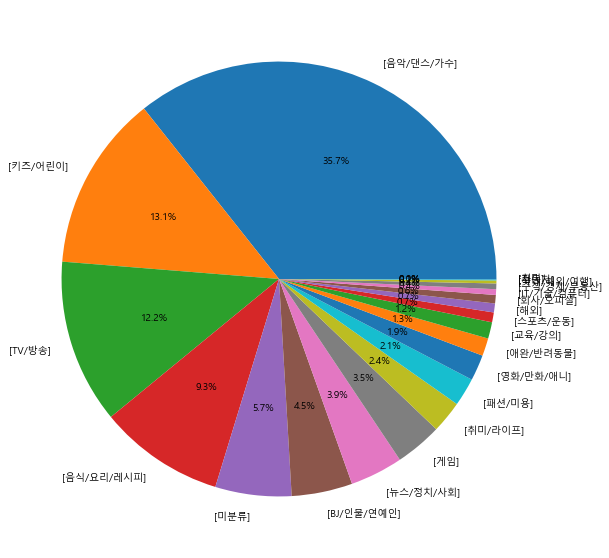

In [58]:
# 카테고리별구독자수시각화하기
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'],
        labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

#### 코드 15.23

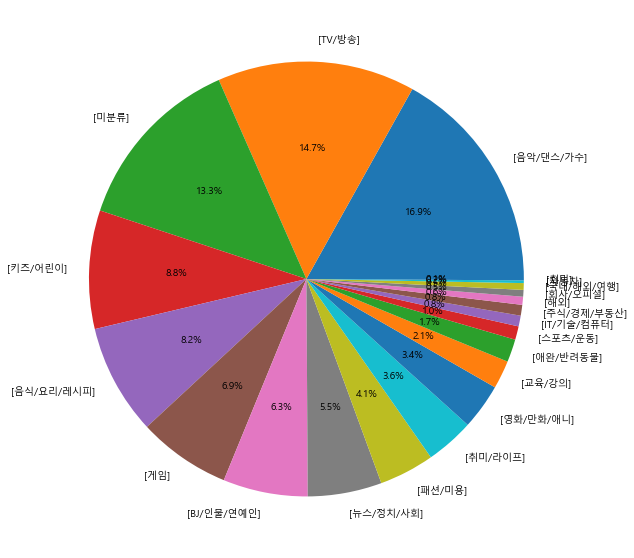

In [59]:
# 카테고리별 채널 수 시각화하기
pivot_df = pivot_df.sort_values(by='category_count', 
                                ascending=False)
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], 
        autopct='%1.1f%%')
plt.show()

---
### Naver 키워드 검색

1. 데이터 획득

먼저 [네이버 개발자 센터](https://developers.naver.com)에서 어플리케이션 등록(api 이용 신청)을 한다.

등록 후, 자신의 Client ID와 비밀번호를 따로 저장해둔다.


#### 코드 15.24

In [1]:
import os
import sys
import urllib.request
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

client_id = "YOUR_CLIENT_ID" #본인 id 입력
client_secret = "YOUR_CLIENT_SECRET" #본인 secret 입력
client_id = "wXsSH_1XqAUZud0SiGUZ" 
client_secret = "CCakxpoWTN" 

url = "https://openapi.naver.com/v1/datalab/shopping/category/keywords"
body = '''{"startDate":"2017-08-01",
"endDate":"2021-03-31",
"timeUnit":"month",
"category":"50000009",
"keyword": [
      {"name": "강릉", "param": ["강릉"]},
      {"name": "제주", "param": ["제주"]},
      {"name": "오사카", "param": ["오사카"]},
      {"name": "괌", "param": ["괌"]}
  ]}'''

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8')) #json -> dict
    print(response_dict)
else:
    print("Error Code:" + rescode)

{'startDate': '2017-08-01', 'endDate': '2021-03-31', 'timeUnit': 'month', 'results': [{'title': '강릉', 'keyword': ['강릉'], 'data': [{'period': '2017-08-01', 'ratio': 3.07962}, {'period': '2017-09-01', 'ratio': 5.5277}, {'period': '2017-10-01', 'ratio': 13.1584}, {'period': '2017-11-01', 'ratio': 8.4706}, {'period': '2017-12-01', 'ratio': 15.04655}, {'period': '2018-01-01', 'ratio': 14.86424}, {'period': '2018-02-01', 'ratio': 19.8841}, {'period': '2018-03-01', 'ratio': 16.00364}, {'period': '2018-04-01', 'ratio': 20.47008}, {'period': '2018-05-01', 'ratio': 19.32417}, {'period': '2018-06-01', 'ratio': 20.06641}, {'period': '2018-07-01', 'ratio': 23.58226}, {'period': '2018-08-01', 'ratio': 32.35887}, {'period': '2018-09-01', 'ratio': 4.51852}, {'period': '2018-10-01', 'ratio': 4.81802}, {'period': '2018-11-01', 'ratio': 9.03704}, {'period': '2018-12-01', 'ratio': 19.02467}, {'period': '2019-01-01', 'ratio': 4.81802}, {'period': '2019-02-01', 'ratio': 7.37027}, {'period': '2019-03-01', 'r

2. 데이터 처리

#### 코드 15.25

In [2]:
#응답받은 자료를 DataFrame으로 변환하여 사용
keywords = ['강릉','제주','오사카','괌']
periods = []
ratio = []

#먼저 period와 ratio를 리스트로 저장
for i,result in enumerate(response_dict['results']):
  ratio_now = []
  for each in result['data']:
    if i==0: 
      periods.append(each['period'])
    ratio_now.append(each['ratio'])
  ratio.append(ratio_now)

In [3]:
#리스트를 DataFrame으로 변환
df = pd.DataFrame(ratio)
df = df.transpose() # 행과 열 바꿔주기
df.index = periods
df.columns = ['강릉', '제주', '오사카', '괌']
df

,강릉,제주,오사카,괌
2017-08-01,3.07962,8.78963,14.46057,59.61325
2017-09-01,5.52770,3.62002,14.35640,19.86457
2017-10-01,13.15840,1.17195,12.81984,32.24168
2017-11-01,8.47060,1.00918,16.12084,60.85682
2017-12-01,15.04655,0.94407,20.38544,46.79992
2018-01-01,14.86424,1.73839,22.37124,100.00000
2018-02-01,19.88410,1.31518,17.14304,63.87785
2018-03-01,16.00364,1.85558,21.72016,60.78520
2018-04-01,20.47008,4.68780,16.45289,86.62022
2018-05-01,19.32417,4.83104,14.55823,54.61944


3. 시각화

#### 코드 15.26

In [4]:
# 시작에 앞서, 한글 깨짐을 막기 위한 설정 진행

from matplotlib import font_manager, rc # 한글 폰트 사용
font_path = "./NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#### 코드 15.27

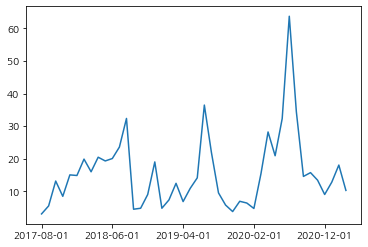

In [5]:
# 시각화를 통해 각각의 검색량 추이 비교해보기
df['강릉'].plot()

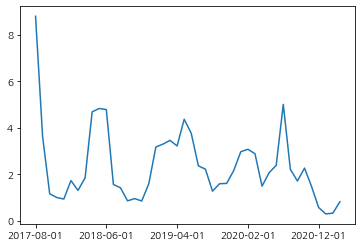

In [6]:
df['제주'].plot()

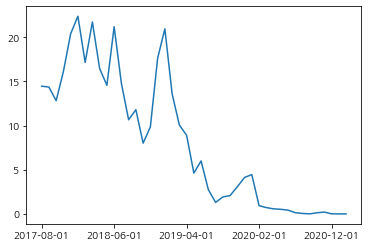

In [7]:
df['오사카'].plot()

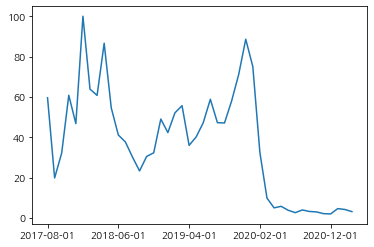

In [8]:
df['괌'].plot()

#### 코드 15.28

Text(0.5, 1.0, '월별 검색량 변화 추이')

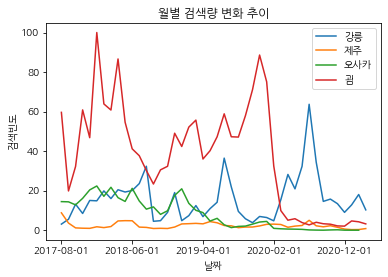

In [9]:
# 각 검색량의 변화를 한눈에 보기
df.plot()
plt.xlabel('날짜')
plt.ylabel('검색빈도')
plt.title('월별 검색량 변화 추이')

4. 분석

#### 코드 15.29

In [10]:
# 각 검색어의 속성들 확인해보기
df.describe()

,강릉,제주,오사카,괌
count,44.000000,44.000000,43.000000,44.000000
mean,15.689197,2.369349,8.185333,37.178671
std,11.385320,1.611946,7.625321,26.934639
min,3.079620,0.306000,0.006510,2.057420
25%,7.266095,1.307043,0.651080,5.626993
50%,13.780190,1.966265,6.002990,38.951100
75%,19.929678,3.188683,14.509400,56.258545
max,63.702060,8.789630,22.371240,100.000000


#### 코드 15.30

In [11]:
# 지역간 (강릉, 제주, 오사카, 괌)의 검색량에 대한 상관관계 확인하기
# -1.0 ~ -0.7 은 강한 음적 선형관계를,
# -0.7 ~ -0.3 은 뚜렷한 음적 선형관계를,
# -0.3 ~ 0.3은 선형관계가 거의 없음을,
# 0.3 ~ 0.7은 뚜렷한 양적 선형관계를,
# 0.7 ~ 1.0은 강한 양적 선형관계를 나타냄

df.corr()

,강릉,제주,오사카,괌
강릉,1.000000,0.090359,-0.198855,-0.281142
제주,0.090359,1.000000,0.186530,0.245934
오사카,-0.198855,0.186530,1.000000,0.561619
괌,-0.281142,0.245934,0.561619,1.000000
